# –¢e–º–∞—Ç–∏—á–µ—Å–∫–æ–µ –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏–µ

In [1]:
! pip install spacy -q
! python -m spacy download ru_core_news_sm -q


2023-06-29 18:22:25.259121: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-29 18:22:27.196806: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 15.3/15.3 MB 15.4 MB/s eta 0:00:00
‚úî Download and installation successful
You can now load the package via spacy.load('ru_core_news_sm')


–ü–æ–¥–∫–ª—é—á–∞–µ–º –±–∏–±–ª–∏–æ—Ç–µ–∫–∏.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import re
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

import json

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Exploratory data analysis

–£–∫–∞–∂–µ–º –ø—É—Ç—å –∫ —Ñ–∞–π–ª—É.

In [3]:
!gdown 1WbUGXxfXmWnBy93DdFQdT28s8eZfZSjj

Downloading...
From: https://drive.google.com/uc?id=1WbUGXxfXmWnBy93DdFQdT28s8eZfZSjj
To: /content/clean_posts.csv
100% 3.79M/3.79M [00:00<00:00, 212MB/s]


–ó–∞–≥—Ä—É–∑–∏–º –¥–∞–Ω–Ω—ã–µ –≤ dataframe.

In [4]:
df = pd.read_csv('/content/clean_posts.csv')
df.head()

account_link       search_keywords  \
0  https://www.linkedin.com/in/varvara-kulmeteva-...  senior web developer   
1               https://www.linkedin.com/in/rauventa       senior frontend   
2       https://www.linkedin.com/in/denis-kuchkildin   middle data analyst   
3  https://www.linkedin.com/in/ACoAAC4yJzEB4TjXkJ...    senior ML engineer   
4         https://www.linkedin.com/in/oleg-malyshkin  senior test engineer   

                name                                              title  \
0  Varvara Kulmeteva            Senior Web Developer - IBS InfinitySoft   
1     Ilya Moiseenko  LOOKING FOR "Senior/Lead Frontend (React) Deve...   
2   Denis Kuchkildin                           Data Analyst at X5 Group   
3       Ian Silantev  MSc Data Science in University of East London ...   
4     Oleg Malyshkin     Senior Test Automation Engineer at GlobalLogic   

    works_at                                              intro  experience  \
0        IBS  –ù–∞–≤—ã–∫–∏: ReactJS ¬∑ JavaScript ¬∑ HTML ¬∑ CSS–ù–∞–≤—ã–∫...        10.0   
1  Centicore  Ilya, React Developer from Moscow.Ilya, React ...         8.0   
2   X5 Group  I have a strong engineering background and mor...         6.0   
3  Neurospot  Absolutely in love with Data Science, AI and M...         2.0   
4        NaN  Hi everyone, I am Oleg Malyshkin - Senior Test...         4.0   

                                place  posts_cnt  \
0  –ú–æ—Å–∫–≤–∞, –ú–æ—Å–∫–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –†–æ—Å—Å–∏—è          0   
1              –ú–æ—Å–∫–≤–∞, –ú–æ—Å–∫–≤–∞, –†–æ—Å—Å–∏—è          1   
2              –ú–æ—Å–∫–≤–∞, –ú–æ—Å–∫–≤–∞, –†–æ—Å—Å–∏—è          1   
3                     –¢–±–∏–ª–∏—Å–∏, –ì—Ä—É–∑–∏—è          0   
4                 –ö–∏–µ–≤, –ö–∏–µ–≤, –£–∫—Ä–∞–∏–Ω–∞          9   

                                           post_text  reaction_cnt  \
0                                                NaN           NaN   
1  –Ø —Ç–æ–ª—å–∫–æ —á—Ç–æ –ø–æ–ª—É—á–∏–ª(–∞) –∑–Ω–∞—á–æ–∫ –∑–∞ –Ω–∞–≤—ã–∫ ¬´JavaS...           1.0   
2  Hi everyone - I am looking for a new role and ...           NaN   
3                                                NaN           NaN   
4  Finding a job for trainees and juniors is a ch...           1.0   

   comments_cnt  repost_cnt  
0           NaN         NaN  
1           NaN         NaN  
2           NaN         NaN  
3           NaN         NaN  
4           NaN         NaN

–û—Å—Ç–∞–≤–∏–º —Ç–æ–ª—å–∫–æ –ø–æ—Å—Ç—ã –Ω–∞ —Ä—É—Å—Å–∫–æ–º.

In [5]:
df = df[df.post_text.astype('str').map(lambda x: x.isascii())==False]

–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Ä–∞–∑–º–µ—Ä –≤—ã–±–æ—Ä–∫–∏.

In [6]:
df.shape

(709, 13)

–ü–æ—Å—á–∏—Ç–∞–µ–º –∫–æ–ª–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∏–º–µ–Ω —Å—Å—ã–ª–æ–∫ –Ω–∞ –∞–∫–∫–∞—É–Ω—Ç—ã.

In [7]:
df.account_link.nunique()

188

787 —Å—Å—ã–ª–æ–∫ –Ω–∞ –∞–∫–∫–∞—É–Ω—Ç—ã.

–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –º–µ—Å—Ç–∞ –ø—Ä–æ–∂–∏–≤–∞–Ω–∏—è –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π. –æ–¢—Ñ–∏—Ç—Ä—É–µ–º —Ç–æ–ª—å–∫–æ —Ç–µ—Ö, –∫—Ç–æ –∂–∏–≤–µ—Ç –≤ –†–§.

In [8]:
df.place.unique()

array(['–ú–æ—Å–∫–≤–∞, –ú–æ—Å–∫–≤–∞, –†–æ—Å—Å–∏—è', '–ö–∏–µ–≤, –ö–∏–µ–≤, –£–∫—Ä–∞–∏–Ω–∞',
       '–ë–∞—Ç–∞–π—Å–∫, –†–æ—Å—Ç–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –†–æ—Å—Å–∏—è', '–†–æ—Å—Å–∏—è',
       '–õ–æ–±–Ω—è, –ú–æ—Å–∫–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –†–æ—Å—Å–∏—è',
       '–†–µ—Å–ø—É–±–ª–∏–∫–∞ –¢–∞—Ç–∞—Ä—Å—Ç–∞–Ω, –†–æ—Å—Å–∏—è',
       '–ü—É—à–∫–∏–Ω–æ, –ú–æ—Å–∫–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –†–æ—Å—Å–∏—è', '–ê—Ä–≥–µ–Ω—Ç–∏–Ω–∞',
       '–°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥, –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥, –†–æ—Å—Å–∏—è',
       '–¢–∞—à–∫–µ–Ω—Ç—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –£–∑–±–µ–∫–∏—Å—Ç–∞–Ω',
       '–•–∏–º–∫–∏, –ú–æ—Å–∫–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –†–æ—Å—Å–∏—è',
       '–†—ã–±–∏–Ω—Å–∫, –Ø—Ä–æ—Å–ª–∞–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –†–æ—Å—Å–∏—è',
       '–ú–æ—Å–∫–≤–∞, –ú–æ—Å–∫–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –†–æ—Å—Å–∏—è',
       '–°—Ç–∞–≤—Ä–æ–ø–æ–ª—å, –°—Ç–∞–≤—Ä–æ–ø–æ–ª—å—Å–∫–∏–π –∫—Ä–∞–π, –†–æ—Å—Å–∏—è',
       '–ö—Ä–∞—Å–Ω–æ–¥–∞—Ä, –ö—Ä–∞—Å–Ω–æ–¥–∞—Ä—Å–∫–∏–π –∫—Ä–∞–π, –†–æ—Å—Å–∏—è', '–ë–∞–ª–∏, –ò–Ω–¥–æ–Ω–µ–∑–∏—è',
       '–ú

In [9]:
foreign = ['–¢–±–∏–ª–∏—Å–∏, –ì—Ä—É–∑–∏—è', '–ö–∏–µ–≤, –ö–∏–µ–≤, –£–∫—Ä–∞–∏–Ω–∞',
       '–°–æ–µ–¥–∏–Ω—ë–Ω–Ω–æ–µ –ö–æ—Ä–æ–ª–µ–≤—Å—Ç–≤–æ',  '–ù–∏–∫–æ—Å–∏—è, –ù–∏–∫–æ—Å–∏—è, –ö–∏–ø—Ä',
     '–ê—Ä–≥–µ–Ω—Ç–∏–Ω–∞',
       '–†–µ—Å–ø—É–±–ª–∏–∫–∞ –ë–µ–ª–∞—Ä—É—Å—å', '–°–µ—Ä–±–∏—è',
       '–ù—É—Ä-–°—É–ª—Ç–∞–Ω, –ö–∞–∑–∞—Ö—Å—Ç–∞–Ω',
       '–¢–∞—à–∫–µ–Ω—Ç—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –£–∑–±–µ–∫–∏—Å—Ç–∞–Ω',
       '–ù—å—é-–ö–∞—Å–ª, –î–µ–ª–∞–≤—ç—Ä, –°–æ–µ–¥–∏–Ω–µ–Ω–Ω—ã–µ –®—Ç–∞—Ç—ã –ê–º–µ—Ä–∏–∫–∏', '–ë–∞–ª–∏, –ò–Ω–¥–æ–Ω–µ–∑–∏—è',
       '–ë–∏—à–∫–µ–∫, –ö–∏—Ä–≥–∏–∑–∏—è',
       '–ë—É–¥–≤–∞, –ß–µ—Ä–Ω–æ–≥–æ—Ä–∏—è',
       '–ë–µ–ª–≥—Ä–∞–¥, –°–µ—Ä–±–∏—è', '–ê–ª–º–∞—Ç—ã, –ö–∞–∑–∞—Ö—Å—Ç–∞–Ω',
       '–ê—Ä–æ–Ω–∞, –ö–∞–Ω–∞—Ä—Å–∫–∏–µ –û—Å—Ç—Ä–æ–≤–∞, –ò—Å–ø–∞–Ω–∏—è',
       '–¶–µ–Ω—Ç—Ä–∞–ª—å–Ω—ã–π –æ–∫—Ä—É–≥, –ò–∑—Ä–∞–∏–ª—å',
       '–ê–≥–ª–æ–º–µ—Ä–∞—Ü–∏—è –ì–µ–Ω—É–∏', '–õ–∏–º–∞—Å–æ–ª, –ö–∏–ø—Ä', '–ë–∞—Ç—É–º–∏, –ì—Ä—É–∑–∏—è',
       '–≠–¥–º–æ–Ω—Ç–æ–Ω, –ê–ª—å–±–µ—Ä—Ç–∞, –ö–∞–Ω–∞–¥–∞', '–£–∑–±–µ–∫–∏—Å—Ç–∞–Ω',
       '–û–±–ª–∞—Å—Ç—å –∑–∞–ª–∏–≤–∞ –°–∞–Ω-–§—Ä–∞–Ω—Ü–∏—Å–∫–æ', '–¢—É—Ä—Ü–∏—è',
       '–°–æ—Ñ–∏—è, Sofia City, –ë–æ–ª–≥–∞—Ä–∏—è',
       '–•—É—Ä–≥–∞–¥–∞, –ö—Ä–∞—Å–Ω–æ–µ –ú–æ—Ä–µ, –ï–≥–∏–ø–µ—Ç', '–ò–∑–º–∏—Ä, –¢—É—Ä—Ü–∏—è', '–õ–∏–º–∞—Å–æ–ª, –õ–∏–º–∞—Å–æ–ª, –ö–∏–ø—Ä', '–ò–∑—Ä–∞–∏–ª—å',
       '–ü–æ–¥–≥–æ—Ä–∏—Ü–∞, –ß–µ—Ä–Ω–æ–≥–æ—Ä–∏—è', '–ï—Ä–µ–≤–∞–Ω, –ï—Ä–µ–≤–∞–Ω, –ê—Ä–º–µ–Ω–∏—è',
       '–ë–µ—Ä–ª–∏–Ω, –ë–µ—Ä–ª–∏–Ω, –ì–µ—Ä–º–∞–Ω–∏—è',
       '–í–∞—Ä—à–∞–≤–∞, –ú–∞–∑–æ–≤–µ—Ü–∫–æ–µ –≤–æ–µ–≤–æ–¥—Å—Ç–≤–æ, –ü–æ–ª—å—à–∞', '–¢–µ–ª—å-–ê–≤–∏–≤—Å–∫–∏–π –æ–∫—Ä—É–≥, –ò–∑—Ä–∞–∏–ª—å',
       '–ë–µ—Ä–Ω–∞–±–∏, –ë—Ä–∏—Ç–∞–Ω—Å–∫–∞—è –ö–æ–ª—É–º–±–∏—è, –ö–∞–Ω–∞–¥–∞', '–ë–∞–Ω–≥–∫–æ–∫, –¢–∞–∏–ª–∞–Ω–¥',
       '–ù—å—é-–ô–æ—Ä–∫, –ù—å—é-–ô–æ—Ä–∫, –°–æ–µ–¥–∏–Ω–µ–Ω–Ω—ã–µ –®—Ç–∞—Ç—ã –ê–º–µ—Ä–∏–∫–∏', '–ù–∏–∫–æ—Å–∏—è, –ö–∏–ø—Ä', '–°–æ–µ–¥–∏–Ω–µ–Ω–Ω—ã–µ –®—Ç–∞—Ç—ã –ê–º–µ—Ä–∏–∫–∏',
       '–ê–≥–ª–æ–º–µ—Ä–∞—Ü–∏—è –ö–∏—Ä–æ–≤–∞', '–ì–æ–ª–ª–∞–Ω–¥–∏—è',
       '–ö—Ä–∏–≤–æ–π –†–æ–≥, –î–Ω–µ–ø—Ä–æ–ø–µ—Ç—Ä–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –£–∫—Ä–∞–∏–Ω–∞',
       'Budge Budge-I, –ó–∞–ø–∞–¥–Ω–∞—è –ë–µ–Ω–≥–∞–ª–∏—è, –ò–Ω–¥–∏—è',
       '–¢–µ–ª—å-–ê–≤–∏–≤, –¢–µ–ª—å-–ê–≤–∏–≤—Å–∫–∏–π –æ–∫—Ä—É–≥, –ò–∑—Ä–∞–∏–ª—å',
       '–î—É–±–∞–π, –û–±—ä–µ–¥–∏–Ω—ë–Ω–Ω—ã–µ –ê—Ä–∞–±—Å–∫–∏–µ –≠–º–∏—Ä–∞—Ç—ã', '–ì–¥–∞–Ω—å—Å–∫, –ü–æ–º–µ—Ä–∞–Ω–∏—è, –ü–æ–ª—å—à–∞',
       '–í–∞—Ä–∞–Ω–∞—Å–∏, –£—Ç—Ç–∞—Ä-–ü—Ä–∞–¥–µ—à, –ò–Ω–¥–∏—è',
       '–†–∏—á–º–æ–Ω–¥, –ê–Ω–≥–ª–∏—è, –°–æ–µ–¥–∏–Ω—ë–Ω–Ω–æ–µ –ö–æ—Ä–æ–ª–µ–≤—Å—Ç–≤–æ',
       '–•–∞—Ä—å–∫–æ–≤, –•–∞—Ä—å–∫–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –£–∫—Ä–∞–∏–Ω–∞', '–ö–∞–∑–∞—Ö—Å—Ç–∞–Ω',
       '–°—Ç–æ–∫–≥–æ–ª—å–º, –õ–µ–Ω –°—Ç–æ–∫–≥–æ–ª—å–º, –®–≤–µ—Ü–∏—è',
       '–®–∞—Ä–¥–∂–∞, –û–±—ä–µ–¥–∏–Ω—ë–Ω–Ω—ã–µ –ê—Ä–∞–±—Å–∫–∏–µ –≠–º–∏—Ä–∞—Ç—ã', '–ï—Ä–µ–≤–∞–Ω, –ê—Ä–º–µ–Ω–∏—è',
       '–õ—å–≤–æ–≤, –õ—å–≤–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –£–∫—Ä–∞–∏–Ω–∞', '–ì–æ–Ω–∫–æ–Ω–≥ (–ö–∏—Ç–∞–π)',
       '–°–∞–Ω-–•–æ—Å–µ, –ö–∞–ª–∏—Ñ–æ—Ä–Ω–∏—è, –°–æ–µ–¥–∏–Ω–µ–Ω–Ω—ã–µ –®—Ç–∞—Ç—ã –ê–º–µ—Ä–∏–∫–∏',
       '–ù–∞–≥–ø—É—Ä, –ú–∞—Ö–∞—Ä–∞—à—Ç—Ä–∞, –ò–Ω–¥–∏—è', '–ù–æ–≤–∏ –°–∞–¥, –í–æ–µ–≤–æ–¥–∏–Ω–∞, –°–µ—Ä–±–∏—è', '–ê–ª–∂–∏—Ä',
       '–î—É–±–∞–π, –î—É–±–∞–π, –û–±—ä–µ–¥–∏–Ω—ë–Ω–Ω—ã–µ –ê—Ä–∞–±—Å–∫–∏–µ –≠–º–∏—Ä–∞—Ç—ã', '–§–∏–ª–∏–ø–ø–∏–Ω—ã', '–ê–≥–ª–æ–º–µ—Ä–∞—Ü–∏—è –ü–∞—Ä–∏–∂–∞',
       '–ê–≥–ª–æ–º–µ—Ä–∞—Ü–∏—è –î–Ω–µ–ø—Ä–∞', '–¢–∞—à–∫–µ–Ω—Ç, –£–∑–±–µ–∫–∏—Å—Ç–∞–Ω',
       '–ê–≥–ª–æ–º–µ—Ä–∞—Ü–∏—è –ú–µ–ª—å–±—É—Ä–Ω–∞', '–¢–∞–ª–∞–º–∞–Ω–∫–∞, –õ–∏–º–æ–Ω, –ö–æ—Å—Ç–∞-–†–∏–∫–∞',
       '–õ–æ–Ω–¥–æ–Ω, –ê–Ω–≥–ª–∏—è, –°–æ–µ–¥–∏–Ω—ë–Ω–Ω–æ–µ –ö–æ—Ä–æ–ª–µ–≤—Å—Ç–≤–æ', '–ú–∏–Ω—Å–∫, –†–µ—Å–ø—É–±–ª–∏–∫–∞ –ë–µ–ª–∞—Ä—É—Å—å']

In [10]:
df = df.query('place not in @foreign')

In [11]:
df.shape

(608, 13)

3/4 —Å—Ç—Ä–æ–∫ –º—ã –ø–æ—Ç–µ—Ä—è–ª–∏.

**–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —á–∏—Å–ª—è–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏.**

In [12]:
df.describe()

experience   posts_cnt  reaction_cnt  comments_cnt  repost_cnt
count  607.000000  608.000000    529.000000    288.000000  290.000000
mean    13.314662   32.485197      4.884688      3.815972    4.244828
std     74.598097   48.707679      2.653602      2.465968    2.704358
min      0.000000    1.000000      1.000000      1.000000    1.000000
25%      2.000000    4.000000      2.000000      2.000000    2.000000
50%      5.000000   10.000000      5.000000      3.000000    4.000000
75%      9.000000   37.000000      7.000000      6.000000    7.000000
max    853.000000  158.000000      9.000000      9.000000    9.000000

# Experience - –æ–ø—ã—Ç.

–û—á–µ–≤–∏–¥–Ω–æ, —á—Ç–æ –µ—Å—Ç—å –≤—ã–±—Ä–æ—Å—ã –ø–æ –æ–ø—ã—Ç—É. –ù—É –Ω–∏–∫–∞–∫ –±–æ–ª—å—à–µ 100 –ª–µ—Ç —É –Ω–∞—Å –Ω–µ –º–æ–∂–µ—Ç –±—ã—Ç—å –≤ —ç—Ç–∏—Ö –¥–∞–Ω–Ω—ã—Ö. –¢–µ–º –±–æ–ª–µ–µ 1432 –ª–µ—Ç. –î–∞–Ω–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫ –º—ã –Ω–µ –æ—Ü–µ–Ω–∏–≤–∞–µ–º. –ü–æ—Å–º–æ—Ç—Ä–∏–º —Å–∫–æ–ª—å–∫–æ —Ç–∞–∫–∏—Ö —Å—Ç—Ä–æ–∫.

In [13]:
len(df[df.experience>100])

7

–ü–æ—Å–º–æ—Ç—Ä–∏–º, –µ—Å—Ç—å –ª–∏ –ø–æ—Å—Ç—ã —É –ª—é–¥–µ–π —Å–æ–ø—ã—Ç–æ–º –±–æ–ª–µ–µ 100 –ª–µ—Ç.

In [14]:
df[df.experience>100].posts_cnt.value_counts(dropna=False)

4    4
8    3
Name: posts_cnt, dtype: int64

–ü–æ—Å—Ç—ã –µ—Å—Ç—å, –Ω–µ –±—É–¥–µ–º –∏—Ö —É–¥–∞–ª—è—Ç—å. –ù–æ –ø–æ—Å–º–æ—Ç—Ä–∏ –Ω–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –±–µ–∑ —ç—Ç–∏—Ö –∑–Ω–∞—á–µ–Ω–∏–π.

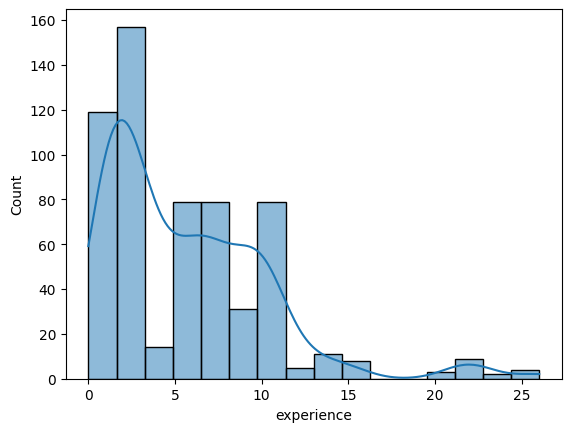

In [15]:
sns.histplot(df.query('experience<100')['experience'], kde=True)
plt.show()

–ö–∞–∫ –≤–∏–¥–Ω–æ, –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π —Å –æ–ø—ã—Ç–æ–º 10 –ª–µ—Ç. –†–µ–∑–∫–∏–π –ø–∏–∫ —É 12. –ò –µ—â–µ –±–æ–ª–µ–µ —Ä–µ–∑–∫–∏–π —Å–ø–∞–¥. –õ—é–¥–µ–π —Å –æ–ø—ã—Ç–æ–º –±–æ–ª–µ–µ 30 –ª–µ—Ç –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏ –Ω–µ—Ç.

# posts_cnt - –∫–æ–ª-–≤–æ –ø–æ—Å—Ç–æ–≤.

–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Ä–∞—Å–ø—Ä–µ–¥–ª–µ–Ω–∏–µ –ø–æ –∫–æ–ª-–≤—É –ø–æ—Å—Ç–æ–≤.

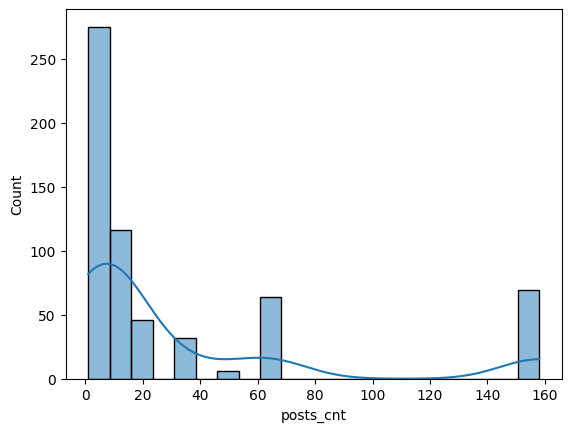

In [16]:
sns.histplot(df.posts_cnt, kde=True)
plt.show()

–ë–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ –ø—Ä–æ—Ñ–∏–ª–µ–π –Ω–µ –∏–º–µ—é—Ç –ø–æ—Å—Ç–æ–≤. –ï—Å—Ç—å –µ–¥–∏–Ω–∏—á–Ω—ã–µ –ø–∏–∫–∏ —É 150 –∏ 300. –ü–æ—Å–º–æ—Ç—Ä–∏–º, —Å–∫–æ–ª—å–∫–æ —É –Ω–∞—Å —Ç–∞–∫–∏—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π.

In [17]:
df[df.posts_cnt>100]['name'].nunique()

1

2 –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è —Å —Ç–∞–∫–∏–º –∫–æ–ª-–≤–æ–º –ø–æ—Å—Ç–æ–≤.

# reaction_cnt - –∫–æ–ª-–≤–æ —Ä–µ–∞–∫—Ü–∏–π.

–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ reaction_cnt.

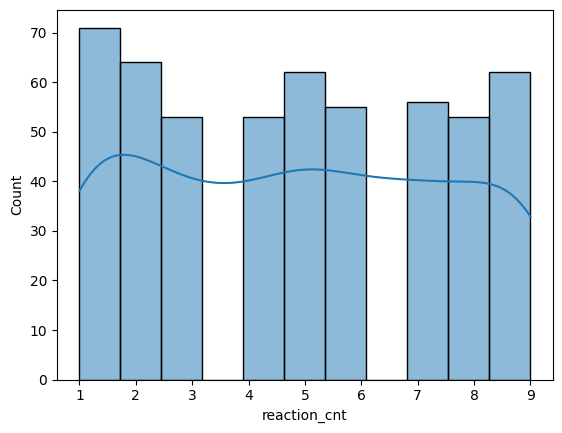

In [18]:
sns.histplot(df.reaction_cnt, kde=True)
plt.show()

–ó–¥–µ—Å—å –≥—Ä–∞—Ñ–∏–∫ –±–æ–ª—å—à–µ –ø–æ—Ö–æ–∂ –Ω–∞ —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ. –ï—Å—Ç—å –∏ –ø—Ä–æ–≤–∞–ª—ã, –∫–æ–Ω–µ—á–Ω–æ. –ü–æ—Å–º–æ—Ç—Ä–∏–º —Å–∫–æ–ª—å–∫–æ –ø–æ—Å—Ç–æ–≤ –±–µ–∑ —Ä–µ–∞–∫—Ü–∏–π.

In [19]:
df.reaction_cnt.value_counts(dropna=False)

NaN    79
1.0    71
2.0    64
9.0    62
5.0    62
7.0    56
6.0    55
3.0    53
4.0    53
8.0    53
Name: reaction_cnt, dtype: int64

–ü–æ–ª—É—á–∞–µ—Ç—Å—è, —á—Ç–æ –æ–∫–æ–ª–æ –ø–æ–ª–æ–≤–∏–Ω—ã –ø–æ—Å—Ç–æ–≤ –±–µ–∑ —Ä–µ–∞–∫—Ü–∏–π.

# comments_cnt - –∫–æ–ª-–≤–æ –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–µ–≤.

–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ reaction_cnt.

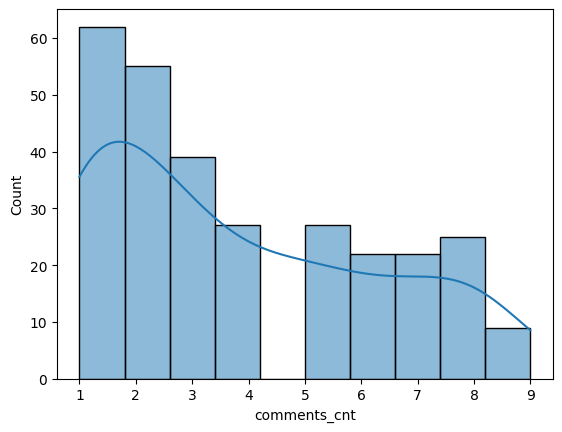

In [20]:
sns.histplot(df.comments_cnt, kde=True)
plt.show()

–ó–¥–µ—Å—å —É –Ω–∞—Å –ø–∏–∫ —É 1, –¥–∞–ª–µ–µ —Å–ø–∞–¥. –£ –±–æ–ª—å—à–∏—Å—Ç–≤–∞, –∫–æ–Ω–µ—á–Ω–æ 0 –≤ –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏—è—Ö. –ü–æ—Å–º–æ—Ç—Ä–∏–º, —Å–∫–æ–ª—å–∫–æ –∏—Ö.

In [21]:
df.comments_cnt.value_counts(dropna=False)

NaN    320
1.0     62
2.0     55
3.0     39
4.0     27
5.0     27
8.0     25
6.0     22
7.0     22
9.0      9
Name: comments_cnt, dtype: int64

3/4 –ø–æ—Å—Ç–æ–≤ –±–µ–∑ –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–µ–≤.

# repost_cnt - –∫–æ–ª-–≤–æ —Ä–µ–ø–æ—Å—Ç–æ–≤.

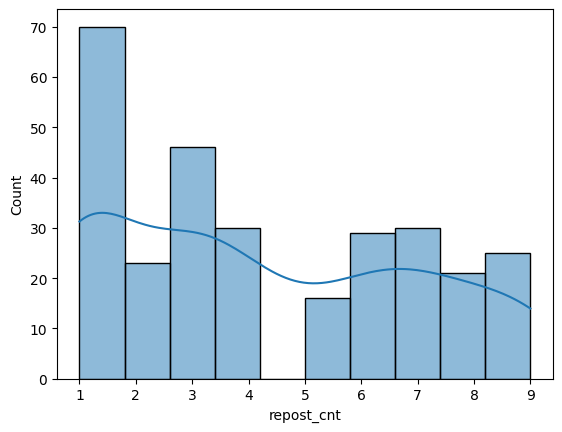

In [22]:
sns.histplot(df.repost_cnt, kde=True)
plt.show()

–ó–¥–µ—Å—å —É –Ω–∞—Å –ø–∏–∫ —É 1, –¥–∞–ª–µ–µ —Å–ø–∞–¥. –£ –±–æ–ª—å—à–∏—Å—Ç–≤–∞, –∫–æ–Ω–µ—á–Ω–æ 0 –≤ –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏—è—Ö. –ü–æ—Å–º–æ—Ç—Ä–∏–º, —Å–∫–æ–ª—å–∫–æ –∏—Ö.

In [22]:
df.repost_cnt.value_counts(dropna=False)

NaN    318
1.0     70
3.0     46
7.0     30
4.0     30
6.0     29
9.0     25
2.0     23
8.0     21
5.0     16
Name: repost_cnt, dtype: int64

3/4 –ø–æ—Å—Ç–æ–≤ –±–µ–∑ —Ä–µ–ø–æ—Å—Ç–æ–≤.

–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ä–µ–ø–æ—Å—Ç–æ–≤ –∏ –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–µ–≤ –æ—á–µ–Ω—å –ø–æ—Ö–æ–∂–∏. –ò–Ω–µ—Ç–µ—Ä–µ—Å–Ω–æ –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å, –∫–∞–∫ –æ–Ω–∏ –∑–∞–≤–∏—Å—è—Ç –¥—Ä—É–≥ –æ—Ç –¥—Ä—É–≥–∞.

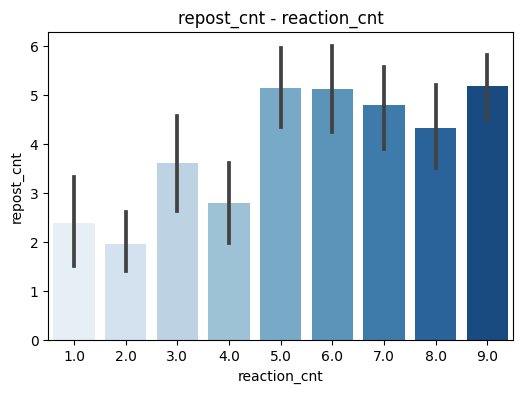

In [24]:
plt.figure(figsize=(6,4))
sns.barplot(x='reaction_cnt', y='repost_cnt', data = df, palette='Blues')
plt.title('repost_cnt - reaction_cnt')
plt.show()

–í—Å–µ —Ç–∞–∫–∂–µ –ª–æ–≥–∏—á–Ω–æ, —Å —É–≤–µ–ª–∏—á–µ–Ω–∏–µ–º –∫–æ–ª-–≤–∞ —Ä–µ–∞–∫—Ü–∏–π –Ω–∞ –ø–æ—Å—Ç, —É–≤–µ–ª–∏—á–∏–≤–∞–µ—Ç—Å—è –∫–æ–ª-–≤–æ —Ç–µ—Ö,–∫ —Ç–æ —Ä–µ–ø–æ—Å—Ç–∏—Ç.

–ü–æ—Å–º–æ—Ç—Ä–∏–º —Å–≤—è–∑–∞–Ω–æ –ª–∏ –∫–æ–ª-–≤–æ —Ä–µ–ø–æ—Å—Ç–æ–≤ —Å —Ä–µ–∞–∫—Ü–∏—è–º–∏.

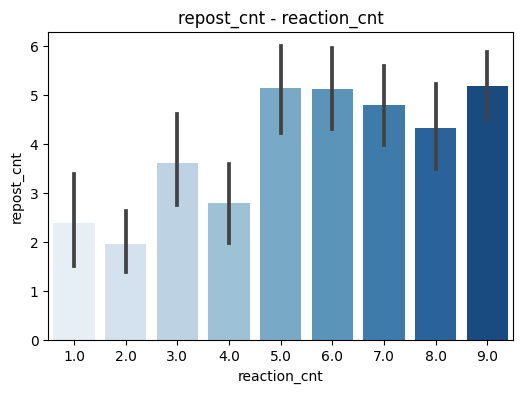

In [23]:
plt.figure(figsize=(6,4))
sns.barplot(x='reaction_cnt', y='repost_cnt', data = df, palette='Blues')
plt.title('repost_cnt - reaction_cnt')
plt.show()

In [24]:
df.head()

account_link     search_keywords  \
1                https://www.linkedin.com/in/rauventa     senior frontend   
15          https://www.linkedin.com/in/ny-yakushenko            frontend   
16          https://www.linkedin.com/in/ny-yakushenko            frontend   
17          https://www.linkedin.com/in/ny-yakushenko            frontend   
28  https://www.linkedin.com/in/yuriy-smirnov-9088...  lead web developer   

                  name                                              title  \
1       Ilya Moiseenko  LOOKING FOR "Senior/Lead Frontend (React) Deve...   
15  Nikolay Yakushenko  Frontend | Full Stack Developer (JavaScript ‚Ä¢ ...   
16  Nikolay Yakushenko  Frontend | Full Stack Developer (JavaScript ‚Ä¢ ...   
17  Nikolay Yakushenko  Frontend | Full Stack Developer (JavaScript ‚Ä¢ ...   
28       Yuriy Smirnov                                 Frontend developer   

           works_at                                              intro  \
1         Centicore  Ilya, React Developer from Moscow.Ilya, React ...   
15        –û–û–û ¬´–ê–†–†¬ª  –Ø–≤–ª—è—é—Å—å Fullstack —Ä–∞–∑—Ä–∞–±–æ—Ç—á–∏–∫–æ–º, –±–µ–∑ —Ç—Ä—É–¥–∞ –≤—ã–ø...   
16        –û–û–û ¬´–ê–†–†¬ª  –Ø–≤–ª—è—é—Å—å Fullstack —Ä–∞–∑—Ä–∞–±–æ—Ç—á–∏–∫–æ–º, –±–µ–∑ —Ç—Ä—É–¥–∞ –≤—ã–ø...   
17        –û–û–û ¬´–ê–†–†¬ª  –Ø–≤–ª—è—é—Å—å Fullstack —Ä–∞–∑—Ä–∞–±–æ—Ç—á–∏–∫–æ–º, –±–µ–∑ —Ç—Ä—É–¥–∞ –≤—ã–ø...   
28  –¶–∏—Ñ—Ä–æ–≤–∞—è –¥–æ–±—ã—á–∞  –ù–∞–≤—ã–∫–∏: Vite ¬∑ Tailwind ¬∑ TypeScript ¬∑ Styled ...   

    experience                                place  posts_cnt  \
1          8.0               –ú–æ—Å–∫–≤–∞, –ú–æ—Å–∫–≤–∞, –†–æ—Å—Å–∏—è          1   
15         3.0  –ë–∞—Ç–∞–π—Å–∫, –†–æ—Å—Ç–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –†–æ—Å—Å–∏—è          3   
16         3.0  –ë–∞—Ç–∞–π—Å–∫, –†–æ—Å—Ç–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –†–æ—Å—Å–∏—è          3   
17         3.0  –ë–∞—Ç–∞–π—Å–∫, –†–æ—Å—Ç–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –†–æ—Å—Å–∏—è          3   
28        15.0                               –†–æ—Å—Å–∏—è          6   

                                            post_text  reaction_cnt  \
1   –Ø —Ç–æ–ª—å–∫–æ —á—Ç–æ –ø–æ–ª—É—á–∏–ª(–∞) –∑–Ω–∞—á–æ–∫ –∑–∞ –Ω–∞–≤—ã–∫ ¬´JavaS...           1.0   
15  –ù–µ–≤–æ–∑–º–æ–∂–Ω–æ –ø—Ä–µ–¥—Å—Ç–∞–≤–∏—Ç—å —Å–≤–æ—é –∂–∏–∑–Ω—å –±–µ–∑ –∑–Ω–∞–Ω–∏—è –∞...           9.0   
16  ùü≠ùü± –°–∏–ª—å–Ω—ã—Ö –ê—Ä—Ç–æ–≤ –æ –ø—Å–∏—Ö–æ–ª–æ–≥–∏–∏ –∏ –∂–∏–∑–Ω–∏ üßò‚Äç‚ôÄÔ∏è –ù–∞—É...           6.0   
17  ‚úÖ–°–µ—Ä–≤–∏—Å—ã –Ω–∞ –±–∞–∑–µ –ò–ò ,–∫–æ—Ç–æ—Ä—ã–µ –ø–æ–º–æ–≥—É—Ç –ø—Ä–æ–∫–∞—á–∞—Ç—å...           1.0   
28  –í—Å–µ–º –¥–æ–±—Ä–æ–≥–æ –≤—Ä–µ–º–µ–Ω–∏ —Å—É—Ç–æ–∫. –í –¥–∞–Ω–Ω—ã–π –º–æ–º–µ–Ω—Ç —Ä–∞...           7.0   

    comments_cnt  repost_cnt  
1            NaN         NaN  
15           6.0         7.0  
16           1.0         6.0  
17           NaN         1.0  
28           NaN         2.0

–ü—Ä–æ–≤–µ—Ä–∏–º, –µ—Å—Ç—å –ª–∏ –≤ –¥–∞–Ω–Ω—ã—Ö —Ä–µ–∫—Ä—É—Ç–µ—Ä—ã.

In [25]:
df[df['title'].str.contains('Recruit')==True]

Empty DataFrame
Columns: [account_link, search_keywords, name, title, works_at, intro, experience, place, posts_cnt, post_text, reaction_cnt, comments_cnt, repost_cnt]
Index: []

–ï—Å—Ç—å —Ç–∞–∫–∏–µ. –ü–æ—Å–º–æ—Ç—Ä–∏–º —Å–∫–æ–ª—å–∫–æ —Ç–∞–∫–∏—Ö –∞–∫–∫–∞—É–Ω—Ç–æ–≤.

In [26]:
len(df[df['title'].str.contains('Recruiter')==True])

0

–ü–æ—á–∏—Å—Ç–∏–º –¥–∞–Ω–Ω—ã–µ –æ—Ç —Ä–µ–∫—Ä—É—Ç–µ—Ä–æ–≤.

In [27]:
df = df[df['title'].str.contains('Recruiter')==False]

In [28]:
df.shape

(608, 13)

In [29]:
df.account_link.nunique()

163

–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –¥–æ–ª–∂–Ω–æ—Å—Ç–∏ –Ω–∞—à–∏—Ö —Å–ø–µ—Ü–∏–∞–ª–∏—Å—Ç–æ–≤.

In [30]:
df.title.unique()

array(['LOOKING FOR "Senior/Lead Frontend (React) Developer" VACANCY',
       'Frontend | Full Stack Developer (JavaScript ‚Ä¢ TypeScript ‚Ä¢ React ‚Ä¢ Redux ‚Ä¢ NodeJS)',
       'Frontend developer',
       'Frontend Developer (HTML, CSS, JS, React, Redux)',
       'FrontEnd developer. React, Typescript, Redux, MobX, HTML, CSS, JS.',
       'Software frontend engineer',
       'Frontend Developer (JavaScript, React.js, TypeScript)',
       'Frontend developer | React | TS | JS',
       'Frontend Developer React/Next | TypeScript/Javascript(ES6+)',
       'Frontend Engineer - Vue.js, Nuxt, Pinia, Vuex, Quasar, Strapi',
       'Frontend Web (ES6+, React.JS, Node.JS ) Developer',
       'Middle Frontend Developer',
       'Frontend Developer ‚Äì –û–û–û "–ê–π–¢–∏ –°–µ—Ä–≤–∏—Å –ú–µ–Ω–µ–¥–∂–º–µ–Ω—Ç"',
       'Frontend –†–∞–∑—Ä–∞–±–æ—Ç—á–∏–∫ (Vue/React) | –ó–∞–∏–Ω—Ç–µ—Ä–µ—Å–æ–≤–∞–Ω –≤ –†–µ–ª–æ–∫–∞—Ü–∏–∏/–£–¥–∞–ª—ë–Ω–Ω–æ–π —Ä–∞–±–æ—Ç–µ',
       'Frontend Developer', 'Frontend —Ä–∞–∑—Ä–∞–±–æ—Ç

In [31]:
mistakes=['–ò—â—É —Å—Ä–æ—á–Ω–æ: –ì–ª–∞–≤–Ω–æ–≥–æ –≥–µ–æ–ª–æ–≥–∞ (–∏–∑—ã—Å–∫–∞–Ω–∏—è)! –õ–æ–∫–∞—Ü–∏—è -–ú–æ—Å–∫–≤–∞ –ª–∏–±–æ –¢–æ–ª—å—è—Ç—Ç–∏', '17000+ | –ö–æ–º–ø–ª–µ–∫—Å–Ω–∞—è –ø–æ–º–æ—â—å –≤ –ø–æ–∏—Å–∫–µ —Ä–∞–±–æ—Ç—ã | im-konsalting.ru  | mail@im-konsalting.ru | WhatsApp/Telegram: 79643223069',
            '–†—É–∫–æ–≤–æ–¥–∏—Ç–µ–ª—å –ø–æ–¥—Ä–∞–∑–¥–µ–ª–µ–Ω–∏–π –º–∞—Ä–∫–µ—Ç–∏–Ω–≥–∞ –∏ —Å—Ç—Ä–∞—Ç–µ–≥–∏—á–µ—Å–∫–æ–≥–æ —Ä–∞–∑–≤–∏—Ç–∏—è –≤ –∫—Ä—É–ø–Ω—ã—Ö –∫–æ–º–ø–∞–Ω–∏—è—Ö –Ω–∞ B2C —Ä—ã–Ω–∫–µ | 11 000+','–°—Ç—Ä–æ—é –∫—Ä—É—Ç—ã–µ –æ—Ç–¥–µ–ª—ã –ø—Ä–æ–¥–∞–∂. –û–±—É—á–∞—é –≤ —Ñ–æ—Ä–º–∞—Ç–µ ¬´–†–µ–∞–ª–∏—Ç–∏¬ª. –Ø - –í–ª–∞–¥–∏–º–∏—Ä –Ø–∫—É–±–∞',
            '–°–ø–µ—Ü–∏–∞–ª–∏—Å—Ç –ø–æ –Ω–∞–π–º—É –ø–µ—Ä—Å–æ–Ω–∞–ª–∞ ‚Äì V Kontakte LLC',]
df=df.query('title not in @mistakes')

–ò—Ç–æ–≥–æ  –Ω–∞—à –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∞–Ω–Ω—ã–π —Ñ–∞–π–ª:

In [32]:
df.shape

(608, 13)

–≠—Ç–æ 2039 —Å—Ç—Ä–æ–∫.

In [33]:
df.account_link.nunique()

163

782 —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π.

In [34]:
df

account_link     search_keywords  \
1                  https://www.linkedin.com/in/rauventa     senior frontend   
15            https://www.linkedin.com/in/ny-yakushenko            frontend   
16            https://www.linkedin.com/in/ny-yakushenko            frontend   
17            https://www.linkedin.com/in/ny-yakushenko            frontend   
28    https://www.linkedin.com/in/yuriy-smirnov-9088...  lead web developer   
...                                                 ...                 ...   
2047                https://www.linkedin.com/in/sky3ddd      senior backend   
2048                https://www.linkedin.com/in/sky3ddd      senior backend   
2050                https://www.linkedin.com/in/sky3ddd      senior backend   
2058           https://www.linkedin.com/in/evgenymelnik      senior backend   
2076   https://www.linkedin.com/in/evgeny-ekim-a3077278      senior backend   

                    name                                              title  \
1         Ilya Moiseenko  LOOKING FOR "Senior/Lead Frontend (React) Deve...   
15    Nikolay Yakushenko  Frontend | Full Stack Developer (JavaScript ‚Ä¢ ...   
16    Nikolay Yakushenko  Frontend | Full Stack Developer (JavaScript ‚Ä¢ ...   
17    Nikolay Yakushenko  Frontend | Full Stack Developer (JavaScript ‚Ä¢ ...   
28         Yuriy Smirnov                                 Frontend developer   
...                  ...                                                ...   
2047      Alex Stakhanov  Senior Backend Developer ‚Äì StreamLayer Inc., e...   
2048      Alex Stakhanov  Senior Backend Developer ‚Äì StreamLayer Inc., e...   
2050      Alex Stakhanov  Senior Backend Developer ‚Äì StreamLayer Inc., e...   
2058       Evgeny Melnik                                  software engineer   
2076         Evgeny Ekim             Senior Backend Developer ‚Äì Noveo Group   

              works_at                                              intro  \
1            Centicore  Ilya, React Developer from Moscow.Ilya, React ...   
15           –û–û–û ¬´–ê–†–†¬ª  –Ø–≤–ª—è—é—Å—å Fullstack —Ä–∞–∑—Ä–∞–±–æ—Ç—á–∏–∫–æ–º, –±–µ–∑ —Ç—Ä—É–¥–∞ –≤—ã–ø...   
16           –û–û–û ¬´–ê–†–†¬ª  –Ø–≤–ª—è—é—Å—å Fullstack —Ä–∞–∑—Ä–∞–±–æ—Ç—á–∏–∫–æ–º, –±–µ–∑ —Ç—Ä—É–¥–∞ –≤—ã–ø...   
17           –û–û–û ¬´–ê–†–†¬ª  –Ø–≤–ª—è—é—Å—å Fullstack —Ä–∞–∑—Ä–∞–±–æ—Ç—á–∏–∫–æ–º, –±–µ–∑ —Ç—Ä—É–¥–∞ –≤—ã–ø...   
28     –¶–∏—Ñ—Ä–æ–≤–∞—è –¥–æ–±—ã—á–∞  –ù–∞–≤—ã–∫–∏: Vite ¬∑ Tailwind ¬∑ TypeScript ¬∑ Styled ...   
...                ...                                                ...   
2047  StreamLayer Inc.  Currently I use: Typescript, gRPC, TypeORM, Po...   
2048  StreamLayer Inc.  Currently I use: Typescript, gRPC, TypeORM, Po...   
2050  StreamLayer Inc.  Currently I use: Typescript, gRPC, TypeORM, Po...   
2058           DzenLab  –ì–æ–ª–æ–≤–Ω–∞—è –∫–æ–º–ø–∞–Ω–∏—è —Ñ–µ–¥–µ—Ä–∞–ª—å–Ω–æ–π —Ä–æ–∑–Ω–∏—á–Ω–æ–π —Å–µ—Ç–∏ –º...   
2076       SberDevices  Project manager of employees assessment and de...   

      experience                                place  posts_cnt  \
1            8.0               –ú–æ—Å–∫–≤–∞, –ú–æ—Å–∫–≤–∞, –†–æ—Å—Å–∏—è          1   
15           3.0  –ë–∞—Ç–∞–π—Å–∫, –†–æ—Å—Ç–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –†–æ—Å—Å–∏—è          3   
16           3.0  –ë–∞—Ç–∞–π—Å–∫, –†–æ—Å—Ç–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –†–æ—Å—Å–∏—è          3   
17           3.0  –ë–∞—Ç–∞–π—Å–∫, –†–æ—Å—Ç–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –†–æ—Å—Å–∏—è          3   
28          15.0                               –†–æ—Å—Å–∏—è          6   
...          ...                                  ...        ...   
2047        26.0       –¢—É–ª–∞, –¢—É–ª—å—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –†–æ—Å—Å–∏—è          7   
2048        26.0       –¢—É–ª–∞, –¢—É–ª—å—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –†–æ—Å—Å–∏—è          7   
2050        26.0       –¢—É–ª–∞, –¢—É–ª—å—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –†–æ—Å—Å–∏—è          7   
2058        14.0           –ö—Ä–∞—Å–Ω–æ–¥–∞—Ä—Å–∫–∏–π –∫—Ä–∞–π, –†–æ—Å—Å–∏—è          2   
2076        10.0               –ú–æ—Å–∫–≤–∞, –ú–æ—Å–∫–≤–∞, –†–æ—Å

In [35]:
df.place.unique()

array(['–ú–æ—Å–∫–≤–∞, –ú–æ—Å–∫–≤–∞, –†–æ—Å—Å–∏—è', '–ë–∞—Ç–∞–π—Å–∫, –†–æ—Å—Ç–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –†–æ—Å—Å–∏—è',
       '–†–æ—Å—Å–∏—è', '–õ–æ–±–Ω—è, –ú–æ—Å–∫–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –†–æ—Å—Å–∏—è',
       '–†–µ—Å–ø—É–±–ª–∏–∫–∞ –¢–∞—Ç–∞—Ä—Å—Ç–∞–Ω, –†–æ—Å—Å–∏—è',
       '–ü—É—à–∫–∏–Ω–æ, –ú–æ—Å–∫–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –†–æ—Å—Å–∏—è',
       '–°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥, –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥, –†–æ—Å—Å–∏—è',
       '–•–∏–º–∫–∏, –ú–æ—Å–∫–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –†–æ—Å—Å–∏—è',
       '–†—ã–±–∏–Ω—Å–∫, –Ø—Ä–æ—Å–ª–∞–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –†–æ—Å—Å–∏—è',
       '–ú–æ—Å–∫–≤–∞, –ú–æ—Å–∫–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –†–æ—Å—Å–∏—è',
       '–°—Ç–∞–≤—Ä–æ–ø–æ–ª—å, –°—Ç–∞–≤—Ä–æ–ø–æ–ª—å—Å–∫–∏–π –∫—Ä–∞–π, –†–æ—Å—Å–∏—è',
       '–ö—Ä–∞—Å–Ω–æ–¥–∞—Ä, –ö—Ä–∞—Å–Ω–æ–¥–∞—Ä—Å–∫–∏–π –∫—Ä–∞–π, –†–æ—Å—Å–∏—è', '–ú–æ—Å–∫–≤–∞, –†–æ—Å—Å–∏—è',
       '–ü–µ—Ä–º—å, –ü–µ—Ä–º—Å–∫–∏–π –∫—Ä–∞–π, –†–æ—Å—Å–∏—è',
       '–Ø—Ä–æ—Å–ª–∞–≤–ª—å, –Ø—Ä–æ—Å–ª–∞–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –†–æ—Å—Å–∏—è',
     

## –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ —Ç–µ–∫—Å—Ç–æ–≤

–¢–æ–∫–µ–Ω–∏–∑–∞—Ü–∏—é –∏ –ª–µ–º–º–∞—Ç–∏–∑–∞—Ü–∏—é —Ç–µ–∫—Å—Ç–æ–≤.

–£—Å—Ç–∞–Ω–∞–≤–ª–∏–≤–∞–µ–º –ª–∏–±—É –∏ –∫–∞—á–∞–µ–º —Ä—É—Å—Å–∫–æ—è–∑—ã—á–Ω—É—é –º–æ–¥–µ–ª—å _ru_core_news_sm_.

In [36]:
model = spacy.load('ru_core_news_sm', disable=['ner', 'parser'])

–°–∫–ª–∞–¥—ã–≤–∞–µ–º –≤—Å–µ –ø–æ—Å—Ç—ã –≤ –æ–¥–∏–Ω —Å–ø–∏—Å–æ–∫

In [37]:
df.post_text.isna().sum()

0

In [38]:
df["post_text"] = df["post_text"].dropna()

In [39]:
df["post_text"]  = df["post_text"] .astype('str')

–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –∫–æ–ª-–≤–æ —Å–∏–º–≤–æ–ª–æ–≤ –≤ –ø–æ—Å—Ç–∞—Ö.

In [40]:
df["symbols"] = [len(x) for x in df['post_text']]

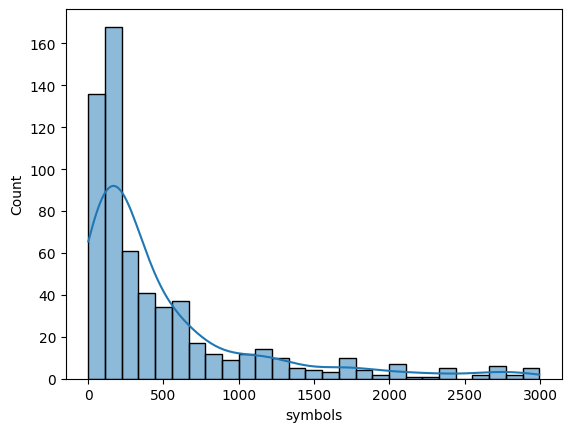

In [41]:
sns.histplot(df.symbols, kde=True)
plt.show()

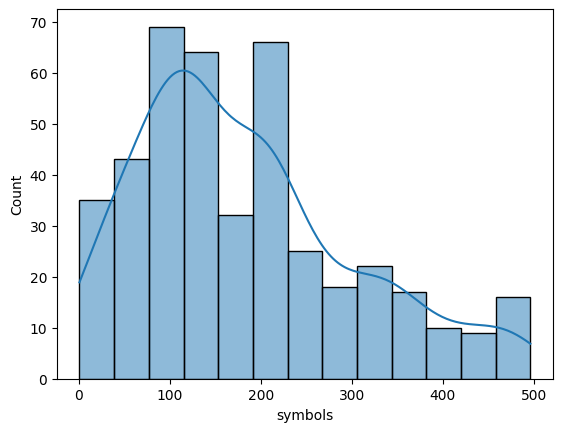

In [42]:
sns.histplot(df[df.symbols<=500].symbols, kde=True)
plt.show()

In [43]:
df[df.symbols<=50]

account_link     search_keywords  \
71    https://www.linkedin.com/in/valeriy-nepluev-89...            frontend   
77    https://www.linkedin.com/in/oleg-kozlov-4191a0217            frontend   
82    https://www.linkedin.com/in/oleg-kozlov-4191a0217            frontend   
136          https://www.linkedin.com/in/sergeyromanovv            frontend   
138          https://www.linkedin.com/in/alenasafronova            frontend   
139          https://www.linkedin.com/in/alenasafronova            frontend   
159              https://www.linkedin.com/in/baremantar            frontend   
180   https://www.linkedin.com/in/%D0%B0%D0%BB%D0%B5...            frontend   
239               https://www.linkedin.com/in/denyacore             backend   
240               https://www.linkedin.com/in/denyacore             backend   
241               https://www.linkedin.com/in/denyacore             backend   
263             https://www.linkedin.com/in/sukhanenkov             backend   
305                  https://www.linkedin.com/in/devhak             backend   
307                  https://www.linkedin.com/in/devhak             backend   
341   https://www.linkedin.com/in/artem-gumarov-7132...            frontend   
393           https://www.linkedin.com/in/maks-alekseev             backend   
453          https://www.linkedin.com/in/ivan-ilushenko         ML engineer   
517               https://www.linkedin.com/in/averkieff         ML engineer   
519               https://www.linkedin.com/in/averkieff         ML engineer   
588       https://www.linkedin.com/in/natalya-n-tsareva  senior QA engineer   
607   https://www.linkedin.com/in/gennady-korolev-57...       senior devops   
617   https://www.linkedin.com/in/ivan-kazantsev-993...       lead frontend   
742   https://www.linkedin.com/in/teacher-cheater-48...            frontend   
749   https://www.linkedin.com/in/teacher-cheater-48...            frontend   
770              https://www.linkedin.com/in/dm-bychkov            frontend   
776              https://www.linkedin.com/in/dm-bychkov            frontend   
904               https://www.linkedin.com/in/serejkaaa   lead data analyst   
906               https://www.linkedin.com/in/serejkaaa   lead data analyst   
941               https://www.linkedin.com/in/yuzhakova   lead data analyst   
948               https://www.linkedin.com/in/yuzhakova   lead data analyst   
953               https://www.linkedin.com/in/yuzhakova   lead data analyst   
1071           https://www.linkedin.com/in/ilyanikishin  lead web developer   
1111              https://www.linkedin.com/in/rovechkin  lead web developer   
1319  https://www.linkedin.com/in/natalia-koroleva-7...  lead test engineer   
1390  https://www.linkedin.com/in/valerii-kalinin-40...  lead test engineer   
1411  https://www.linkedin.com/in/dina-rozhkova-1b21...  lead test engineer   
1419  https://www.linkedin.com/in/dina-rozhkova-1b21...  lead test engineer   
1484  https://www.linkedin.com/in/oleg-yamshikov-b46...         lead devops   
1502  https://www.linkedin.com/in/pavel-andreev-7771...         lead devops   
1538  https://www.linkedin.com/in/oleg-kurchavov-2a4...         lead devops   
1539  https://www.linkedin.com/in/oleg-kurchavov-2a4...         lead devops   
1648  https://www.linkedin.com/in/anastasiya-saydazi...            frontend   
1653  https://www.linkedin.com/in/anastasiya-saydazi...            frontend   
1731  https://www.linkedin.com/in/petr-novikov-98621639  senior ML engineer   
1758                https://www.linkedin.com/in/matohin  senior ML engineer   
1778  https://www.linkedin.com/in/mark-averchenko-1b...  senior ML engineer   

                                        name  \
71                           Valeriy Nepluev   
77                               Oleg Kozlov   
82                               Oleg Kozlov   
136                           Sergey Romanov   
138                          –ê–ª–µ–Ω–∞ –°–∞—Ñ—Ä–æ–Ω–æ–≤–∞   
139                        

In [44]:
texts = df["post_text"].tolist()

–í—ã–ø–æ–ª–Ω—è–µ–º –ª–µ–º–º–∞—Ç–∏–∑–∞—Ü–∏—é —Ç–µ–∫—Å—Ç–æ–≤.

In [45]:
res = []
for doc in model.pipe(texts, disable=["tagger", "parser"]):
    res.append([token.lemma_ for token in doc])

In [46]:
with open("lemmas.json", "w") as fid:
    json.dump({"lemmas": res}, fid)

–°–æ—Ö—Ä–∞–Ω–∏–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç, —á—Ç–æ–±—ã –Ω–µ –ø–æ–≤—Ç–æ—Ä—è—Ç—å –ª–µ–º–º–∞—Ç–∏–∑–∞—Ü–∏—é –∑–∞–Ω–æ–≤–æ –≤ —Å–ª–µ–¥—É—é—â–∏–π —Ä–∞–∑.

–°–º–æ—Ç—Ä–∏–º –Ω–∞ —Ä–µ–∑—É–ª—å—Ç–∞—Ç - —Å–ª—É—á–∞–π–Ω—ã–º –æ–±—Ä–∞–∑–æ–º —Å—ç–º–ø–ª–∏—Ä—É–µ–º –Ω–µ—Å–∫–æ–ª—å–∫–æ –ø—Ä–∏–º–µ—Ä–æ–≤

In [47]:
", ".join(res[np.random.randint(len(res))])

'–∑–∞–Ω—è—Ç–Ω—ã–π, —Ü–∏—Ç–∞—Ç–∞, –∏–∑, –∫–Ω–∏–≥–∞, ", —á–µ–ª–æ–≤–µ—á–µ—Å–∫–∏–π, —Ñ–∞–∫—Ç–æ—Ä":‚Äú–∫–æ–≤–∞—Ä–Ω—ã–π, —ç—Ñ—Ñ–µ–∫—Ç, —Ç–µ–∫—É—á–∫–∞, –≤, —Ç–æ–º, ,, —á—Ç–æ, –æ–Ω–∞, –ø–æ—Ä–æ–∂–¥–∞—Ç—å, —Ç–µ–∫—É—á–∫–∞, ., —á–µ–ª–æ–≤–µ–∫, —É—Ö–æ–¥–∏—Ç—å, –±—ã—Å—Ç—Ä–æ, ,, –ø–æ—ç—Ç–æ–º—É, –Ω–µ—Ç, —Å–º—ã—Å–ª, —Ç—Ä–∞—Ç–∏—Ç—å, –¥–µ–Ω—å–≥–∞, –Ω–∞, –æ–Ω–∏, –æ–±—É—á–µ–Ω–∏–µ, ., –ø–æ—Å–∫–æ–ª—å–∫—É, –∫–æ–º–ø–∞–Ω–∏—è, –Ω–∏—á—Ç–æ, –Ω–µ, –≤–∫–ª–∞–¥—ã–≤–∞—Ç—å, –≤, —á–µ–ª–æ–≤–µ–∫, ,, –µ–º—É, –ª–µ–≥–∫–æ, —Å, –æ–Ω–∞, —Ä–∞—Å–ø—Ä–æ—â–∞—Ç—å—Å—è, ., –Ω–æ–≤—ã–π, —Å–æ—Ç—Ä—É–¥–Ω–∏–∫, –Ω–∞–Ω–∏–º–∞—Ç—å, –Ω–µ, –∑–∞, –æ–Ω–∏, –ø—Ä–µ–≤–æ—Å—Ö–æ–¥–Ω—ã–π, –∫–∞—á–µ—Å—Ç–≤–æ, ,, –ø–æ—Å–∫–æ–ª—å–∫—É, –∑–∞–º–µ–Ω–∏—Ç—å, —Ç–∞–∫–æ–π, –∫–∞—á–µ—Å—Ç–≤–æ, –±—ã—Ç—å, —Å–ª–∏—à–∫–æ–º, —Å–ª–æ–∂–Ω—ã–π, ., –æ—â—É—â–µ–Ω–∏–µ, –∂–µ, ,, —á—Ç–æ, –∫–æ–º–ø–∞–Ω–∏—è, –Ω–µ, –≤–∏–¥–µ—Ç—å, –≤, —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–µ, –Ω–∏—á—Ç–æ, –Ω–µ–æ–±—ã—á–∞–π–Ω—ã–π, ,, –≤—ã–∑—ã–≤–∞—Ç—å, —É, —ç—Ç–æ—Ç, —Å–æ—Ç—Ä—É–¥–Ω–∏–∫, —á—É–≤—Å—Ç–≤–æ, –Ω–µ–æ—Ü–µ–Ω–µ–Ω–Ω–æ—Å—Ç–∏, –∫–∞–∫, –

In [48]:
", ".join(res[np.random.randint(len(res))])

'–∑–¥—Ä–∞–≤—Å—Ç–≤–æ–≤–∞—Ç—å, ,, —è, –≤, –ø–æ–∏—Å–∫, –Ω–æ–≤—ã–π, –∫–∞—Ä—å–µ—Ä–Ω—ã–π, –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å, –∏, –±—ã—Ç—å, –ø—Ä–∏–∑–Ω–∞—Ç–µ–ª–µ–Ω(–∞, ), –∑–∞, –≤–∞—à, –ø–æ–¥–¥–µ—Ä–∂–∫–∞, ., –∑–∞—Ä–∞–Ω–µ–µ, –±–ª–∞–≥–æ–¥–∞—Ä–∏—Ç—å, –∑–∞, –≤–µ—Å—å, —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏—è, –∫–æ–Ω—Ç–∞–∫—Ç, ,, —Å–æ–≤–µ—Ç, –∏–ª–∏, –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å, ,, –∫–æ—Ç–æ—Ä—ã–µ, –≤—ã, –º–æ—á—å, –ø—Ä–µ–¥–ª–æ–∂–∏—Ç—å, ., #, opentowork'

In [49]:
", ".join(res[np.random.randint(len(res))])

'!, !, !, –æ—á–µ–Ω—å, —É–¥–æ–±–Ω—ã–π, —à–ø–∞—Ä–≥–∞–ª–∫–∞, –ø–æ, git, !, !, !, —Ç–æ—Ç, –∫—Ç–æ, –µ—â—ë, –Ω–µ, —Å–¥–µ–ª–∞—Ç—å, —ç—Ç–æ, ,, –ø—Ä–∏–≥–ª–∞—à–∞—Ç—å, –ø–æ–¥–ø–∏—Å–∞—Ç—å—Å—è, üëç, –Ω–∞, –º–æ–π, —Ç–µ–ª–µ–≥—Ä–∞–º–º, -, –∫–∞–Ω–∞–ª, qa, ‚ù§, life, \xa0, https://t.me/QA4Life.–≠—Ç–æ, –∫–∞–Ω–∞–ª, –¥–ª—è, –Ω–∞—á–∏–Ω–∞—Ç—å, üßë, –∏, –æ–ø—ã—Ç–Ω—ã–π, üßî, —Ç–µ—Å—Ç–∏—Ä–æ–≤—â–∏–∫–æ–≤, ,, qa, –∏, qc, üßê, ,, –∞, —Ç–∞–∫–∂–µ, –±—ã—Ç—å, –ø–æ–ª–µ–∑–Ω—ã–π, —Ç–∞–∫–∂–µ, –¥–ª—è, po, ,, pm, ,, da, ,, ba, –∏, sm, —Å–ø–µ—Ü–∏–∞–ª–∏—Å—Ç, üë®, \u200d, üë©, \u200d, üë¶, \u200d, üë¶, ., –∑–¥–µ—Å—å, —è, –µ–∂–µ–¥–Ω–µ–≤–Ω–æ, –¥–µ–ª–∏—Ç—å—Å—è, üóÉ, –µ—â—ë, –±–æ–ª—å—à–∏–π, –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ, –º–∞—Ç–µ—Ä–∏–∞–ª, –ø–æ, it, üåê, —Ç–µ–º–∞—Ç–∏–∫–∞, (, —Å—Ç–∞—Ç—å—è, ,, –æ–±—É—á–∞—Ç—å, –≤–∏–¥–µ–æ, ,, –Ω–æ–≤–æ—Å—Ç—å, ,, –∏—Ç, -, —é–º–æ—Ä, ,, –æ–ø—Ä–æ—Å, ,, –æ–±—Å—É–∂–¥–µ–Ω–∏–µ, ‚Ä¶, )#it, \xa0, #, engineer, \xa0, #, software, \xa0, #, qa, \xa0, #, qc, \xa0, #, quality, \xa0, #, recruiter, \xa0, #, recruiting, \



–£–¥–∞–ª–∏–º –∑–Ω–∞–∫–∏ –ø—Ä–µ–ø–∏–Ω–∞–Ω–∏—è, —Ü–∏—Ñ—Ä—ã –∏ —Å–ª–æ–≤–∞, —Å–æ–¥–µ—Ä–∂–∞—â–∏–µ —Ü–∏—Ñ—Ä—ã. –î–ª—è —ç—Ç–æ —Å–æ–±–µ—Ä—ë–º —Ä–µ–≥—É–ª—è—Ä–Ω–æ–µ –≤—ã—Ä–∞–∂–µ–Ω–∏–µ, –∫–æ—Ç–æ—Ä–æ–µ –ø–æ–¥—Ö–æ–¥–∏—Ç –¥–ª—è –ª—é–±–æ–≥–æ —Å–ª–æ–≤–∞, —Å–æ—Å—Ç–æ—è—â–µ–≥–æ –∏–∑ –±—É–∫–≤ –∫–∏—Ä–∏–ª–∏—Ü—ã.



In [50]:
word_pattern = re.compile("^[–∞-—è–ê-–Ø—ë–Å]*$")

In [51]:
def remove_symbols(doc):
    return [token for token in doc if word_pattern.match(token)]

In [52]:
corpus = list(map(remove_symbols, res))

In [53]:
", ".join(corpus[np.random.randint(len(corpus))])

'–ª–∏–Ω–∫—É—Å—å–∫–∏–Ω—ã, –º–æ–π, –ø–æ–¥—Ä—É–≥–∞, –∑–∞—Ä–∏–Ω–∞, –±—É–∫–ª–æ–≤–∞, –∞–Ω–∞–ª–∏—Ç–∏–∫, —Å–µ–π—á–∞—Å, –≤, –∞–∫—Ç–∏–≤–Ω—ã–π, –ø–æ–∏—Å–∫, –ø—Ä—è–º, –º–æ–π, –ª–∏—á–Ω—ã–π, —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏—è, –≤–µ–¥—å, –Ω–µ, –∏–º–µ–π, —Ä—É–±–ª—å, –∞, –∏–º–µ–π, –¥—Ä—É–≥, –∫–æ—Ç–æ—Ä—ã—Ö, –º–æ—á—å, –ø–æ—Ä–µ–∫–æ–º–µ–Ω–¥–æ–≤–∞—Ç—å, –∫, –Ω–∞—ë–º, —Ç–∞–∫, –≥–ª–∞—Å–∏—Ç—å, –Ω–∞—Ä–æ–¥–Ω—ã–π, –≤—ã–¥—É–º–∞—Ç—å, –º–Ω–æ—é, –ø—Ä–µ–º—É–¥—Ä–æ—Å—Ç—å, —á–µ—Å—Ç–Ω–æ–π, —Å–ª–æ–≤–æ, –±—ã—Ç—å, –±—ã, —É, –º–µ–Ω—è, –ø–æ–∑–∏—Ü–∏—è, –¥–ª—è, –Ω–µ–µ, –≤–∞—â–µ, –±, –Ω–µ, –æ—Ç–¥–∞—Ç—å, –Ω–∏–∫—Ç–æ, —ç—Ç–æ, —á–µ–ª–æ–≤–µ–∫, –∫–æ—Ç–æ—Ä—ã–π, –º–æ—á—å, –∏–∑—É—á–∏—Ç—å, –≤—Å—ë, –∏, –≤–µ—Å—å, –≤, –∫—Ä–∞—Ç—á–∞–π—à–∏–µ, —Å—Ä–æ–∫, –≤—Å–µ–≥–¥–∞, –∑–∞–≤–∏–¥–æ–≤–∞—Ç—å, —ç—Ç–æ—Ç, –Ω–∞–≤—ã–∫—É, –∏, –≤—Å–µ–≥–¥–∞, –≥–æ–≤–æ—Ä–∏—Ç—å, —á—Ç–æ, –µ—Å–ª–∏, –∑–∞—Ä–∏–Ω–∞, –Ω—É–∂–Ω—ã–π, –±—ã—Ç—å, –Ω–∞—É—á–∏—Ç—å—Å—è, –∫–æ–Ω—Å—Ç—Ä—É–∏—Ä–æ–≤–∞—Ç—å, —Ä–∞–∫–µ—Ç–∞, –∏–ª–∏, —É–ø—Ä–∞–≤–ª—è—Ç—å, —Ç—Ä–∞–∫—Ç–æ—Ä, –æ–Ω–∞, –ø—Ä–æ—Å—Ç–æ, –≤–∑—è—Ç—å, –ø–∞—Ä–∞, –¥–µ–

–í—ã–≥–ª—è–¥–∏—Ç –≥–æ—Ä–∞–∑–¥–æ –ª—É—á—à–µ.

## –í–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏—è —Ç–µ–∫—Å—Ç–æ–≤

–ß—Ç–æ–±—ã —É–º–µ–Ω—å—à–∏—Ç—å —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å –ø–æ–ª—É—á–∞–µ–º–æ–π –º–∞—Ç—Ä–∏—Ü—ã, –¥–æ–±–∞–≤–∏–º –∏—Å–∫–ª—é—á–µ–Ω–∏–µ —Å—Ç–æ–ø-—Å–ª–æ–≤.

In [54]:
stop_words = stopwords.words('russian')
print(stop_words)

['–∏', '–≤', '–≤–æ', '–Ω–µ', '—á—Ç–æ', '–æ–Ω', '–Ω–∞', '—è', '—Å', '—Å–æ', '–∫–∞–∫', '–∞', '—Ç–æ', '–≤—Å–µ', '–æ–Ω–∞', '—Ç–∞–∫', '–µ–≥–æ', '–Ω–æ', '–¥–∞', '—Ç—ã', '–∫', '—É', '–∂–µ', '–≤—ã', '–∑–∞', '–±—ã', '–ø–æ', '—Ç–æ–ª—å–∫–æ', '–µ–µ', '–º–Ω–µ', '–±—ã–ª–æ', '–≤–æ—Ç', '–æ—Ç', '–º–µ–Ω—è', '–µ—â–µ', '–Ω–µ—Ç', '–æ', '–∏–∑', '–µ–º—É', '—Ç–µ–ø–µ—Ä—å', '–∫–æ–≥–¥–∞', '–¥–∞–∂–µ', '–Ω—É', '–≤–¥—Ä—É–≥', '–ª–∏', '–µ—Å–ª–∏', '—É–∂–µ', '–∏–ª–∏', '–Ω–∏', '–±—ã—Ç—å', '–±—ã–ª', '–Ω–µ–≥–æ', '–¥–æ', '–≤–∞—Å', '–Ω–∏–±—É–¥—å', '–æ–ø—è—Ç—å', '—É–∂', '–≤–∞–º', '–≤–µ–¥—å', '—Ç–∞–º', '–ø–æ—Ç–æ–º', '—Å–µ–±—è', '–Ω–∏—á–µ–≥–æ', '–µ–π', '–º–æ–∂–µ—Ç', '–æ–Ω–∏', '—Ç—É—Ç', '–≥–¥–µ', '–µ—Å—Ç—å', '–Ω–∞–¥–æ', '–Ω–µ–π', '–¥–ª—è', '–º—ã', '—Ç–µ–±—è', '–∏—Ö', '—á–µ–º', '–±—ã–ª–∞', '—Å–∞–º', '—á—Ç–æ–±', '–±–µ–∑', '–±—É–¥—Ç–æ', '—á–µ–≥–æ', '—Ä–∞–∑', '—Ç–æ–∂–µ', '—Å–µ–±–µ', '–ø–æ–¥', '–±—É–¥–µ—Ç', '–∂', '—Ç–æ–≥–¥–∞', '–∫—Ç–æ', '—ç—Ç–æ—Ç', '—Ç–æ–≥–æ', '–ø–æ—Ç–æ–º—É', '—ç—Ç–æ–≥–æ', '–∫–∞–∫–æ–π', '—Å–æ–≤—Å–µ–º', '–Ω–∏–º', '–∑

In [55]:
tfidf = TfidfVectorizer(stop_words=stop_words, min_df=10, max_df=0.9)

–¢.–µ. TfIdfVectorizer –ø—Ä–∏–Ω–∏–º–∞–µ—Ç –Ω–∞ –≤—Ö–æ–¥ —Å–ø–∏—Å–æ–∫ –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏–π, –ø–æ—ç—Ç–æ–º—É –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –æ–±—ä–µ–¥–∏–Ω–∏—Ç—å —Å–ø–∏—Å–∫–∏ —Å–ª–æ–≤, —Å–æ—Å—Ç–∞–≤–ª—è—é—â–∏—Ö –∫–æ—Ä–ø—É—Å, –≤ –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏—è.

In [56]:
docs = [" ".join(tokens) for tokens in corpus]
docs[:3]

['—è —Ç–æ–ª—å–∫–æ —á—Ç–æ –∑–Ω–∞—á–æ–∫ –∑–∞ –Ω–∞–≤—ã–∫ –∫—Ç–æ —Ö–æ—Ç–µ—Ç—å –±—ã—Ç—å —Å–ª–µ–¥—É—é—â–∏–π –ø—Ä–æ–π—Ç–∏ —Ç–µ—Å—Ç –Ω–∞ –ø—Ä–æ–≤–µ—Ä–∫–∞ –Ω–∞–≤—ã–∫',
 '–Ω–µ–≤–æ–∑–º–æ–∂–Ω—ã–π –ø—Ä–µ–¥—Å—Ç–∞–≤–∏—Ç—å —Å–≤–æ–π –∂–∏–∑–Ω—å –±–µ–∑ –∑–Ω–∞–Ω–∏–µ –∞–Ω–≥–ª–∏–π—Å–∫–∏–π —è–∑—ã–∫ –∏ –µ–≥–æ –º–æ–∂–Ω–æ –∏–∑—É—á–∏—Ç—å —Å–∞–º–æ—Å—Ç–æ—è—Ç–µ–ª—å–Ω–æ –¥–µ–ª–∏—Ç—å—Å—è —Å –≤–∞–º–∏ —Ä–µ—Å—É—Ä—Å –∫–æ—Ç–æ—Ä—ã–µ –±—ã—Ç—å –ø–æ–ª–µ–∑–Ω—ã–π –¥–ª—è —Å–∞–º–æ—Å—Ç–æ—è—Ç–µ–ª—å–Ω—ã–π –∏–∑—É—á–µ–Ω–∏–µ –∞–Ω–≥–ª–∏–π—Å–∫–∏–π —è–∑—ã–∫ –±–µ—Å–ø–ª–∞—Ç–Ω—ã–π —Å–∞–π—Ç –¥–ª—è –∏–∑—É—á–µ–Ω–∏–µ –≥—Ä–∞–º–º–∞—Ç–∏–∫–∞ –ø—Ä–∏–∫–æ–ª—å–Ω—ã–π —Ä–µ—Å—É—Ä—Å –≥–¥–µ –≤—ã –º–æ—á—å –ø–æ–æ–±—â–∞—Ç—å—Å—è —Å –∏—Å–∫—É—Å—Ç–≤–µ–Ω–Ω—ã–º –∏–Ω—Ç–µ–ª–ª–µ–∫—Ç —Ä–∞—Å–ø—Ä–æ—Å—Ç—Ä–∞–Ω–∏—Ç—å –∏–∑ —Å–∞–º—ã—Ö –ø–æ–ø—É–ª—è—Ä–Ω—ã–π –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ —É–ø—Ä–æ—â–∞—Ç—å –∂–∏–∑–Ω—å –ø—Ä–∏ –≤–µ–¥–µ–Ω–∏–µ –¥–∏–∞–ª–æ–≥ —Ç–æ—Ç –∫—Ç–æ —á–∞—Å—Ç–æ –ø–∏—Å–∞—Ç—å –æ—Ç–ª–∏—á–Ω—ã–π —Ä–µ—Å—É—Ä—Å–∞ —Å –æ–±—ä—è—Å–Ω–µ–Ω–∏–µ –ø—Ä–∞–≤–∏–ª–æ –∏ —à–∞–±–ª–æ–Ω –ø—Ä–æ—Å–º–æ—Ç—

In [57]:
docs = list(filter(None, docs))

In [58]:
x = tfidf.fit_transform(docs)

In [59]:
x.shape

(476, 275)

–¢–µ–ø–µ—Ä—å —Å–æ—Å—Ç–∞–≤–∏–º —Å–ª–æ–≤–∞—Ä—å {id_—Ç–æ–∫–µ–Ω–∞: —Ç–æ–∫–µ–Ω} - –æ–Ω –ø—Ä–∏–≥–æ–¥–∏—Ç—Å—è –Ω–∞–º –ø–æ–∑–¥–Ω–µ–µ.

In [60]:
id2word = {i: token for i, token in enumerate(tfidf.get_feature_names_out())}

## LDA

–¢–µ–ø–µ—Ä—å –º–æ–∂–µ–º –∑–∞–ø—É—Å—Ç–∏—Ç—å –∞–ª–≥–æ—Ä–∏—Ç–º LDA. –ó–∞–¥–∞–¥–∏–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ç–µ–º —Ä–∞–≤–Ω–æ–µ 5.

In [61]:
n_topics = 5

In [62]:
lda = LatentDirichletAllocation(n_components=n_topics, random_state=31)

In [63]:
topics = lda.fit_transform(x)

In [64]:
topics.shape

(476, 5)

### –ö–ª—é—á–µ–≤—ã–µ —Å–ª–æ–≤–∞

–¢–µ–ø–µ—Ä—å –∏–∑–≤–ª–µ—á—ë–º –∫–ª—é—á–µ–≤—ã–µ —Å–ª–æ–≤–∞ –¥–ª—è –∫–∞–∂–¥–æ–π –∏–∑ 5 —Ç–µ–º. –í —Å–≤–æ–π—Å—Ç–µ _components_ _ –ª–µ–∂–∏—Ç –º–∞—Ç—Ä–∏—Ü–∞ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏—è —Å–ª–æ–≤ —Ç–µ–º–∞–º. –ü—Ä–æ–π–¥—ë–º—Å—è –ø–æ –∫–∞–∂–¥–æ–π –∏–∑ 5 –≤—ã–¥–µ–ª–µ–Ω–Ω—ã—Ö —Ç–µ–º –∏ –¥–ª—è –∫–∞–∂–¥–æ–π –≤–æ–∑—å–º—ë–º –¢–û–ü-20 —Å–ª–æ–≤.

–ü–æ –æ—á–µ—Ä–µ–¥–∏ –ø—Ä–æ–π–¥—ë–º—Å—è –ø–æ –∫–∞–∂–¥–æ–π —Ç–µ–º–µ (–ø–µ—Ä–≤–æ–µ –∏–∑–º–µ—Ä–µ–Ω–∏–µ –º–∞—Å—Å–∏–∞) –∏ –≤—ã–±–µ—Ä–µ–º –¢–û–ü-20 —Å–ª–æ–≤, –Ω–∞–∏–±–æ–ª–µ–µ —Ö–∞—Ä–∞–∫—Ç–µ—Ä–Ω—ã—Ö –¥–ª—è —ç—Ç–æ–π —Ç–µ–º—ã. –ü–æ—Ç–æ–º –ø–æ –∏–Ω–¥–µ–∫—Å—É —Å–ª–æ–≤–∞ –æ–±—Ä–∞—Ç–∏–º—Å—è –∫ —Å–ª–æ–≤–∞—Ä—é –∏ —É–∑–Ω–∞–µ–º, —á—Ç–æ —ç—Ç–æ –∑–∞ —Å–ª–æ–≤–æ.

In [65]:
for i in range(n_topics):
    c = lda.components_[i, :]
    topic_tokens = [id2word.get(token_id) for token_id in np.argsort(c)[-20:]]
    print("–¢–µ–º–∞",i+1, ":")
    print(", ".join(topic_tokens))
    print("\n ")

–¢–µ–º–∞ 1 :
—Ä–∞–¥, –ø—Ä–∏–≤–µ—Ç, –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å, –ø—Ä–∏–∑–Ω–∞—Ç–µ–ª–µ–Ω, –Ω–æ–≤—ã–π, –≤–∞—à, –º–æ—á—å, –∫–æ—Ç–æ—Ä—ã–µ, –ø–æ–∏—Å–∫, –≤–µ—Å—å, –∑–¥—Ä–∞–≤—Å—Ç–≤–æ–≤–∞—Ç—å, –ø—Ä–µ–¥–ª–æ–∂–∏—Ç—å, —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏—è, –±–ª–∞–≥–æ–¥–∞—Ä–∏—Ç—å, –∫–∞—Ä—å–µ—Ä–Ω—ã–π, –ø–æ–¥–¥–µ—Ä–∂–∫–∞, —Å–æ–≤–µ—Ç, –∑–∞—Ä–∞–Ω–µ–µ, –∫–æ–Ω—Ç–∞–∫—Ç, –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å

 
–¢–µ–º–∞ 2 :
–º–æ—á—å, –Ω–∞—à, –ø–æ–∏—Å–∫, –µ—â—ë, –Ω–∞–ø–∏—Å–∞—Ç—å, –∑–∞–¥–∞—á–∞, –ø—Ä–æ–µ–∫—Ç, —á–µ–ª–æ–≤–µ–∫, –≥–æ–¥, –∏–Ω—Ç–µ—Ä–µ—Å–Ω—ã–π, –≤–µ—Å—å, –∫–æ–º–∞–Ω–¥–∞, —Ö–æ—Ä–æ—à–∏–π, –æ—á–µ–Ω—å, —Å–≤–æ–π, —Ä–∞–±–æ—Ç–∞—Ç—å, –æ–ø—ã—Ç, –≤—Ä–µ–º—è, —ç—Ç–æ, —Ä–∞–±–æ—Ç–∞

 
–¢–µ–º–∞ 3 :
—Ä–µ–ø–æ—Å—Ç—ã, –∫—Ä—É—Ç–æ–π, —Ä–æ—Å—Å–∏—è, –∫—Ä—É–ø–Ω—ã–π, –ø—Ä–∏–≤–µ—Ç, –ø–æ–∫–∞, –ø—Ä–æ–µ–∫—Ç, —Ä–µ–∑—é–º–µ, —Ä–∞–∑—Ä–∞–±–æ—Ç—á–∏–∫, –ø–æ–∑–∏—Ü–∏—è, –≤—Å–µ–º, –∏—Å–∫–∞—Ç—å, –≤–∞–∫–∞–Ω—Å–∏—è, –Ω–æ–≤—ã–π, –∫–æ–º–ø–∞–Ω–∏—è, –Ω–∞—á–∏–Ω–∞—Ç—å, —Ä–∞–±–æ—Ç–∞, –¥–æ–ª–∂–Ω–æ—Å—Ç—å, —Å–æ–æ–±—â–∞—Ç—å, —É–¥–æ–≤–æ–ª—å—Å—Ç–≤–∏–µ

 
–¢–µ–º–∞ 4 :
—É–¥–æ–±–Ω—ã–π, –æ–ø—ã

–ü–æ –ø–æ–ª—É—á–µ–Ω–Ω—ã–º –∫–ª—é—á–µ–≤—ã–º —Å–ª–æ–≤–∞–º –º–æ–∂–Ω–æ —Å–æ—Å—Ç–∞–≤–∏—Ç—å –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–∏–µ –æ —Å–æ–¥–µ—Ä–∂–∞–Ω–∏–∏ —Ç–æ–π –∏–ª–∏ –∏–Ω–æ–π —Ç–µ–º—ã. –•–æ—Ç—è –∏–Ω–æ–≥–¥–∞ —Å–æ—á–µ—Ç–∞–Ω–∏—è —Å–ª–æ–≤ –¥–æ–≤–æ–ª—å–Ω–æ —Å—Ç—Ä–∞–Ω–Ω—ã–µ )  

### –¢–∏–ø–∏—á–Ω—ã–µ —Å—Ç–∞—Ç—å–∏

–¢–µ–ø–µ—Ä—å –¥–ª—è –∫–∞–∂–¥–æ–π —Ç–µ–º—ã –≤–æ–∑—å–º—ë–º –ø–æ –æ–¥–Ω–æ–º—É –¥–æ–∫—É–º–µ–Ω—Ç—É, –∫–æ—Ç–æ—Ä—ã–π —Ö–æ—Ä–æ—à–æ —Å–æ–æ—Ç–≤–µ—Ç—Å–≤—É–µ—Ç —ç—Ç–æ–π —Ç–µ–º–µ. –î–ª—è —ç—Ç–æ–≥–æ –∑–∞–≥–ª—è–Ω–µ–º –≤ –º–∞—Å—Å–∏–≤ _topics_.

In [66]:
for i in range(n_topics):
    doc_id = np.argmax(topics[:, i])
    print("–¢–µ–º–∞ ", i)
    print(df.iloc[doc_id]["post_text"])
    print("\n")

–¢–µ–º–∞  0
–ù–∞–¥–µ—é—Å—å –∫–æ–º—É-–Ω–∏–±—É–¥—å –±—É–¥–µ—Ç –ø–æ–ª–µ–∑–Ω–∞ –¥–∞–Ω–Ω–∞—è —Å—Ç–∞—Ç—å—è;) üíª


–¢–µ–º–∞  1
–ï—Å–ª–∏ –≤—ã —Ö–æ—Ç–∏—Ç–µ –ø–æ–ø—Ä–æ–±–æ–≤–∞—Ç—å –∫—Ä—É—Ç—É—é –≥–µ–Ω–µ—Ä–∞—Ü–∏—é –∫–∞—Ä—Ç–∏–Ω–æ–∫ –ø–æ —Ç–µ–∫—Å—Ç—É, —Ç–æ —Å–µ–≥–æ–¥–Ω—è midjourney —Ä–∞–∑–¥–∞–µ—Ç –±–µ—Å–ø–ª–∞—Ç–Ω—ã–µ –ø—Ä–∏–≥–ª–∞—à–µ–Ω–∏—è –∫ —Å–µ–±–µ –≤ –±–µ—Ç—É!


–¢–µ–º–∞  2
–ü–∞—Ä–µ–Ω—å –Ω–∞–ø–∏—Å–∞–ª –∏ –ø–æ—á—Ç–∏ 10 –ª–µ—Ç –ø–æ–¥–¥–µ—Ä–∂–∏–≤–∞–µ—Ç –±–∏–±–ª–∏–æ—Ç–µ–∫—É js –Ω–∞ –∫–æ—Ç–æ—Ä–æ–π —Å—Ç–æ–∏—Ç web-—Ñ—Ä–æ–Ω—Ç–µ–Ω–¥ –≤—Å–µ–π —Å–µ—Ç–∏. –û—Ç–∫–∞–∑–∞–ª—Å—è –æ—Ç –≤—Å–µ–≥–æ –∏ –ø–æ–∂–µ—Ä—Ç–≤–æ–≤–∞–ª –¥–ª—è OpenSource —Å—Ç–æ–ª—å–∫–æ, —á—Ç–æ –Ω–µ–≤–æ–∑–º–æ–∂–Ω–æ –∏ –ø—Ä–µ–¥—Å—Ç–∞–≤–∏—Ç—å. –ü—Ä–∏ —ç—Ç–æ–º –µ–≥–æ –ø–∏–Ω–∞—é—Ç –∑–∞ —Ç–æ, —á—Ç–æ –æ–Ω —á—Ç–æ-—Ç–æ –≤—è–∫–∞–µ—Ç –ø—Ä–æ –¥–µ–Ω—å–≥–∏ –∏ –∑–∞ —Ç–æ, —á—Ç–æ –æ–Ω —Ä—É—Å—Å–∫–∏–π. –ß–µ—Ä—Ç —Å –Ω–∏–º–∏ —Å Netflix, Ebay, Paypal, Pornhub –∏ –≤—Å–µ–º–∏ –æ—Å—Ç–∞–ª—å–Ω—ã–º–∏ –≤–µ–±-—Å–µ—Ä–≤–∏—Å–∞–º–∏ (–≤ –±—É–∫–≤–∞–ª—å–Ω–æ–º —Å–º—ã—Å–ª–µ). –ù–µ—É–

–¢–∏–ø–∏—á–Ω—ã–µ —Å—Ç–∞—Ç—å–∏, –≤ —Ü–µ–ª–æ–º —Ö–æ—Ä–æ—à–æ —Å–æ–≥–ª–∞—Å—É—é—Ç—Å—è —Å –∫–ª—é—á–µ–≤—ã–º–∏ —Å–ª–æ–≤–∞–º–∏, –∫–æ—Ç–æ—Ä—ã–µ –º—ã –≤—ã–¥–µ–ª–∏–ª–∏. –ù–∞–ø—Ä–∏–º–µ—Ä, –ø–µ—Ä–≤–∞—è –≤—ã–¥–µ–ª–µ–Ω–Ω–∞—è —Ç–µ–º–∞ - –ø—Ä–æ –µ–≥–∏–ø—Ç–æ–ª–æ–≥–∏—é –∏ –∞—Ä—Ö–µ–æ–ª–æ–≥–∏—é.
 –í —Ç–æ–∂–µ –≤—Ä–µ–º—è, –º—ã –≤–∏–¥–∏–º –∏ –æ—á–µ–Ω—å –∫–æ—Ä–æ—Ç–∫–∏–µ —Ç–µ–∫—Å—Ç—ã, –Ω–∞–ø—Ä–∏–º–µ—Ä 4 –∏ 14. –≠—Ç–æ –ø–æ–¥—Å–∫–∞–∑—ã–≤–∞–µ—Ç –¥–∞–ª—å–Ω–µ–π—à–∏–µ —à–∞–≥–∏. –ù–∞–ø—Ä–∏–º–µ—Ä:
  - —É–¥–∞–ª–∏—Ç—å –∏–∑ –∫–æ—Ä–ø—É—Å–∞ —Ç–µ–∫—Å—Ç–æ–≤ –æ—á–µ–Ω—å –∫–æ—Ä–æ—Ç–∫–∏–µ —Å—Ç–∞—Ç—å–∏. –ß—Ç–æ–±—ã –ø—Ä–∞–≤–∏–ª—å–Ω–æ –∑–∞–¥–∞—Ç—å –ø–æ—Ä–æ–≥ –æ—Ç—Å–µ—á–µ–Ω–∏—è, –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –ø–æ—Å—Ç—Ä–æ–∏—Ç—å —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ç–µ–∫—Å—Ç–æ–≤ –ø–æ –¥–ª–∏–Ω–µ.   - –≤–æ–∑–º–æ–∂–Ω–æ, –∫–ª—é—á–µ–≤—ã–º–∏ —Å–ª–æ–≤–∞–º–∏, –Ω–∞ –∫–æ—Ç–æ—Ä—ã–µ –æ—Ä–∏–µ–Ω—Ç–∏—Ä–æ–≤–∞–ª—Å—è –∞–ª–≥–æ—Ä–∏—Ç–º, —Å—Ç–∞–ª–∏ –Ω–∞–∑–≤–∞–Ω–∏—è –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω–Ω—ã—Ö –∞–≥–µ–Ω—Ç—Å—Ç–≤ - –†–ë–ö –∏ –ò–¢–ê–†-–¢–ê–°–°. –°—Ç–æ–∏—Ç –ø–æ–¥—É–º–∞—Ç—å –æ —Ç–æ–º, —á—Ç–æ–±—ã –¥–æ–±–∞–≤–∏—Ç—å —ç—Ç–∏ —Å–ª–æ–≤–∞ –≤ —Å—Ç–æ–ø-–ª–∏—Å—Ç.

–ê –µ—â—ë –≤—ã –≤—Å–µ–≥–¥–∞ –º–æ–∂–µ—Ç–µ —Å–¥–µ–ª–∞—Ç—å —à–∞–≥ –Ω–∞–∑–∞–¥ –∏ –¥–æ–ø–æ–ª–Ω–∏—Ç—å –º–æ–¥–µ–ª—å. –ù–∞–ø—Ä–∏–º–µ—Ä:
- –ø–æ–ø–æ–ª–Ω–∏—Ç—å —Å–ø–∏—Å–æ–∫ —Å—Ç–æ–ø-—Å–ª–æ–≤ (–ø—Ä–æ—Å–º–æ—Ç—Ä–∏—Ç–µ –≤–Ω–∏–º–∞—Ç–µ–ª—å–Ω–æ –∫–ª—é—á–µ–≤—ã–µ —Å–ª–æ–≤–∞ –∫–∞–∂–¥–æ–π –∏–∑ —Ç–µ–º - –Ω–µ—Ç –ª–∏ —Ç–∞–º —Å–ª—É—á–∞–π–Ω—ã—Ö —Å–ª–æ–≤?);
- –∏–∑–º–µ–Ω–∏—Ç—å –Ω–∞—Å—Ç—Ä–æ–π–∫–∏ Tf-idF;
- —É–≤–µ–ª–∏—á–∏—Ç—å/—É–º–µ–Ω—å—à–∏—Ç—å –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ç–µ–º;
- –æ–±—É—á–∞—Ç—å LDA —á—É—Ç—å –¥–æ–ª—å—à–µ;
- –∑–∞–º–µ–Ω–∏—Ç—å LDA –Ω–∞ –¥—Ä—É–≥–æ–π –∞–ª–≥–æ—Ä–∏—Ç–º —Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–≥–æ –º–æ–¥–µ–ª–∏—Ä–æ—è–Ω–∏.

# –ü–æ–ª–µ–∑–Ω—ã–µ —Å—Å—ã–ª–∫–∏

- [–í–∏–∫–∏](https://ru.wikipedia.org/wiki/%D0%A2%D0%B5%D0%BC%D0%B0%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B5_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5)

- [–ò—Å—Ç–æ—Ä–∏—è –æ —Ç–æ–º, –∫–∞–∫ –ø—Ä–æ—á–∏—Ç–∞—Ç—å 120 —Ç—ã—Å—è—á –∞–Ω–µ–∫–¥–æ—Ç–æ–≤ –∏ –Ω–µ —Ä–∞—Å—Å–º–µ—è—Ç—å—Å—è —Ä–∞–Ω—å—à–µ –≤—Ä–µ–º–µ–Ω–∏](https://habr.com/ru/companies/otus/articles/723306/)

- [–í–∏–¥–µ–æ—É—Ä–æ–∫ "–ê–Ω–∞–ª–∏–∑ —Ç–µ–∫—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö —Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–µ –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏–µ –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–µ–≤ –í–∫–æ–Ω—Ç–∞–∫—Ç–µ"](https://www.youtube.com/watch?v=0DnfzQdbwQw)

- [LDA –≤ Sklearn](https://scikit-learn.org/0.16/modules/generated/sklearn.lda.LDA.html)

- [Topic Modeling —Ä–∞–∑–Ω—ã–º–∏ –∞–ª–≥–æ—Ä–∏—Ç–º–∞–º–∏](https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html#sphx-glr-auto-examples-applications-plot-topics-extraction-with-nmf-lda-py)

- [–ë–æ–ª–µ–µ –∞–∫–∞–¥–µ–º–∏—á–µ—Å–∫–æ–µ –æ–ø–∏—Å–∞–Ω–∏–µ —Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–≥–æ –º–æ–¥–µ–ª–∏—Ä–æ–≤–Ω–∏—è](http://www.machinelearning.ru/wiki/index.php?title=%D0%A2%D0%B5%D0%BC%D0%B0%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B5_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5)